In [1]:
import numpy as np  
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model

from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from Autoencoder_Functions import *
os.chdir('Synthetic_4')

Using TensorFlow backend.


## Parameters

In [2]:
k = 50 # Define the k parameter for the precision at k

## Read Data

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()
# The length of one image vector
img_size = data.shape[1]

## Load the Saved Models¶

In [4]:
# Generate and Compile a Deep Autoencoder
# Specify the model config
encoder_layers_size, decoder_layers_size = get_deep_model_config()
# Extract the saved model
autoencoder, encoder = compile_autoencoder(img_size,encoder_layers_size, decoder_layers_size) 
autoencoder = load_model('model_autoencoder.h5') # Load the saved model

/Users/ivanzhou/General_Software/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


### Compare the original and the reconstructed data

/Users/ivanzhou/General_Software/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


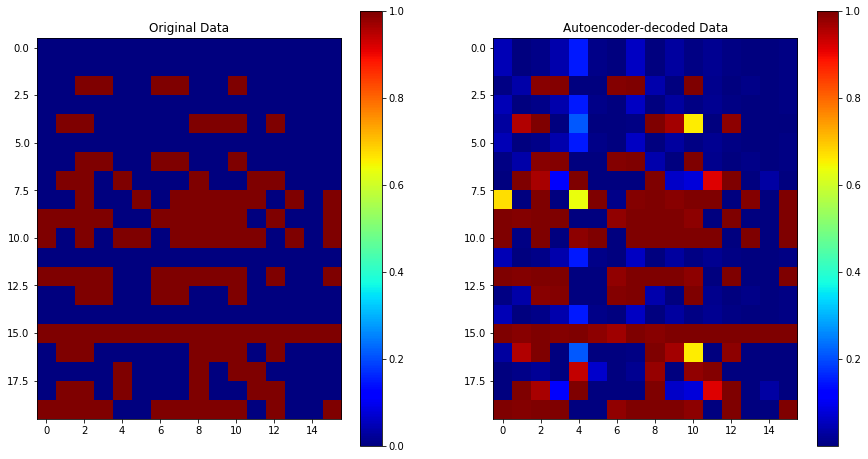

In [5]:
data_decoded,data = reconstruct_with_autoencoder(autoencoder,data,image = False)
plot_2datasets(data[:20],data_decoded[:20],'Original Data', 'Autoencoder-decoded Data')

## Implement the Anomaly Detection¶with the Construction Error

In [6]:
data_train_decoded,data_train = reconstruct_with_autoencoder(autoencoder,data_train,image = False)
data_test_decoded,data_test = reconstruct_with_autoencoder(autoencoder,data_test,image=False)

The higher the reconstruction error, the more likely the point will be an anomaly


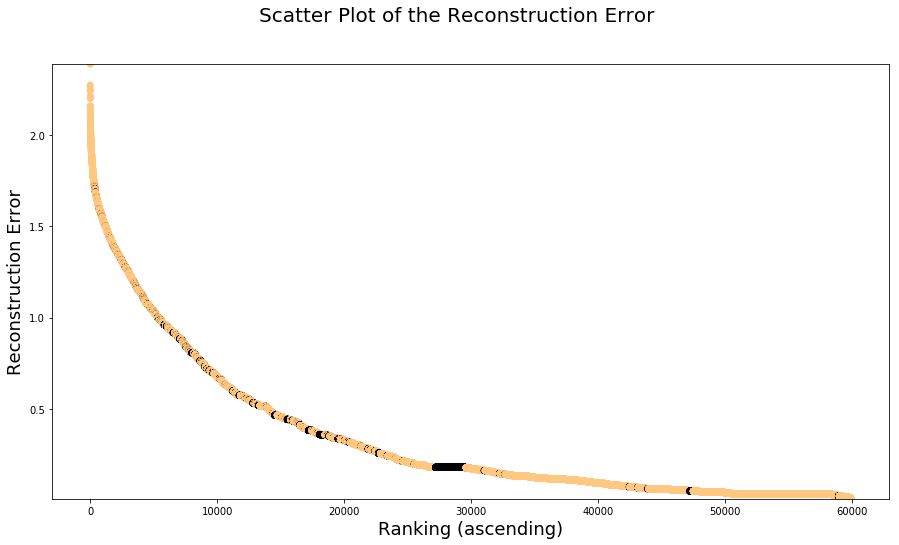

Training Results:
Precision: 20.5%
Recall: 91.4%
F-score: 33.5%
R-Precision (# R = 6722): 7.5%
Precision@50: 0.0%

Testing Results:
Precision: 20.5%
Recall: 91.8%
F-score: 33.5%
R-Precision (# R = 2895): 8.0%
Precision@50: 0.0%


In [7]:
train_test_with_reconstruction_error(data_train, data_train_decoded, data_test, data_test_decoded, labels_train, labels_test,k)